<a href="https://colab.research.google.com/github/Pelado91/data-science-1/blob/main/Generacion_Solar_Metzler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Visualización de Generación Solar
**Alumno:** Facundo
**Fecha:** 27 Julio 2025


# Introduccion al Analisis del Sistema de Generación Solar

Este proyecto se centra en el análisis de datos de generación solar con el objetivo de comprender patrones de producción energética y factores climáticos que influyen en su desempeño.

El dataset utilizado contiene información horaria de variables como radiación solar, temperatura ambiente, humedad relativa y generación de energía, entre otros. A través de un proceso de análisis exploratorio (EDA) y visualizaciones, se busca identificar relaciones entre las condiciones climáticas y la eficiencia en la producción energética.

La motivación de este trabajo surge de la creciente importancia de las energías renovables en la transición hacia sistemas más sostenibles y eficientes. En particular, la energía solar fotovoltaica se ha convertido en una fuente clave para reducir emisiones de carbono y garantizar el acceso a energía limpia. Sin embargo, su aprovechamiento depende de condiciones ambientales que varían de forma dinámica.

Este análisis pretende aportar información que permita optimizar la gestión de la energía solar, mejorar la planificación de recursos y anticipar escenarios de baja o alta generación. De este modo, se generan recomendaciones útiles tanto en el plano operativo como estratégico.


# Objetivo

El objetivo principal de este análisis es identificar los factores climáticos y temporales que afectan la generación solar, con el fin de proponer estrategias que optimicen la producción y el uso eficiente de la energía en base a datos reales.


# Sistema Comercial

La energía solar representa una de las fuentes renovables más prometedoras para abastecer la demanda energética global. No obstante, su carácter intermitente y dependiente de variables ambientales plantea desafíos en la planificación y operación de sistemas eléctricos.

Empresas y organismos dedicados a la generación de energía requieren herramientas de análisis que permitan anticipar la disponibilidad de energía solar, para así mejorar la gestión de la oferta, ajustar contratos de suministro y garantizar la estabilidad del sistema eléctrico.

# Problema Comercial

El principal problema a resolver es la variabilidad de la generación solar y la falta de predicciones precisas sobre su comportamiento. Esto genera incertidumbre en la operación, impacta en la toma de decisiones y puede llevar a pérdidas económicas o a la necesidad de recurrir a fuentes no renovables para suplir la demanda.

# Contexto Analítico

Desde un punto de vista analítico, los datos disponibles permiten explorar relaciones entre la radiación solar, temperatura, humedad relativa y la energía generada. A través del análisis exploratorio de datos (EDA) y modelos predictivos, es posible identificar patrones que ayuden a anticipar la generación futura y mejorar la gestión operativa.

El enfoque incluye:
- Limpieza y análisis de valores faltantes.
- Visualización de relaciones univariadas, bivariadas y multivariadas.
- Generación de insights que permitan tomar decisiones.
- Propuesta de modelos de machine learning adecuados para predicción.


## Preguntas de Interés e Hipótesis

1. ¿La generación de energía solar es significativamente mayor entre las 11:00 y las 15:00 hs?
2. ¿Existe una correlación negativa entre la humedad relativa y la producción de energía?
3. ¿La temperatura ambiental afecta la eficiencia de la generación solar?

Estas hipótesis buscan establecer relaciones entre variables meteorológicas y el rendimiento energético, para anticipar comportamientos en función del clima.

In [ ]:
#Importamos las librerias a trabajar

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.feature_selection import RFECV

pd.set_option('display.max_columns', 120)
sns.set_theme()




'Este dataset contiene datos de generación de energía solar en distintas fechas, probablemente asociados a una planta solar o simulación de producción energética.'

In [ ]:


# ==============================
# 📂 Carga del dataset

import pandas as pd

# Cargar directamente desde GitHub
url = "https://github.com/Pelado91/data-science-1/raw/main/1.%20Generaci%C3%B3n%20solar.xlsx"
df = pd.read_excel(url, sheet_name='Train')

# Mostrar dimensiones
print("✅ Dataset cargado correctamente")
print("Filas y columnas:", df.shape)

# Primeras filas
display(df.head())

# Información general del dataset
print("\n📌 Información del dataset:")
df.info()

# Estadísticas básicas
print("\n📊 Descripción estadística:")
display(df.describe(include="all"))


✅ Dataset cargado correctamente
Filas y columnas: (175296, 18)


,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0



📌 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind D

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,1.752960e+05,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.462145e+15,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,9.432488e+15,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,1.220000e-01,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,4.210000e+00,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.335000e+03,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.178000e+03,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.094000e+16,360.000000,12.900000,100.000000


# Variables potencialmente interesantes:

- `GHI` (Global Horizontal Irradiance): mide la radiación solar incidente total. Es clave para estimar la producción solar.
- `Temperature`: permite analizar cómo varía la producción según el clima.
- `Pressure` y `Humidity`: factores climáticos que pueden afectar la eficiencia.
- `Wind Speed`: puede influir en la disipación de calor de paneles solares.

In [ ]:
# Vista general del archivo
df.shape, df.columns


((175296, 18),
 Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
        'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
        'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
        'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag'],
       dtype='object'))

In [ ]:
df.columns.tolist()

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Clearsky DHI',
 'Clearsky DNI',
 'Clearsky GHI',
 'Cloud Type',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Fill Flag']

In [ ]:
# Creamos columna de fecha-hora
df["Datetime"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour", "Minute"]])
df = df.sort_values("Datetime")

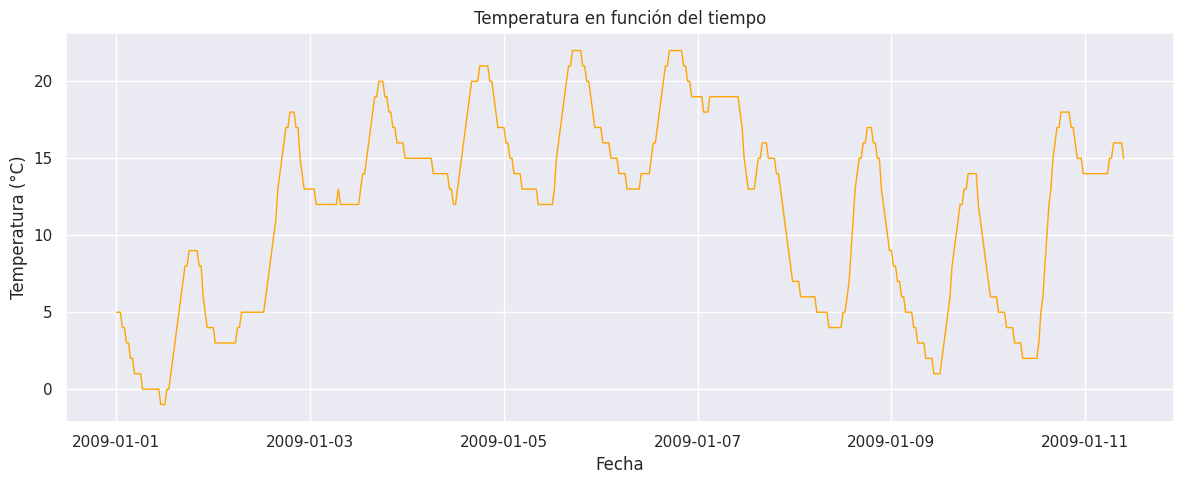

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df["Datetime"].iloc[:500], df["Temperature"].iloc[:500], color="orange", linewidth=1)
plt.title("Temperatura en función del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Analisis respecto a la temperatura:** La temperatura presenta una variación horaria clara, con incrementos en las horas centrales del día y descensos en la noche. Esto puede correlacionarse con la eficiencia de los paneles solares, que suele disminuir si la temperatura es excesivamente alta, a pesar de que haya alta radiación solar. Este patrón es importante para modelar la producción de energía a lo largo del día.



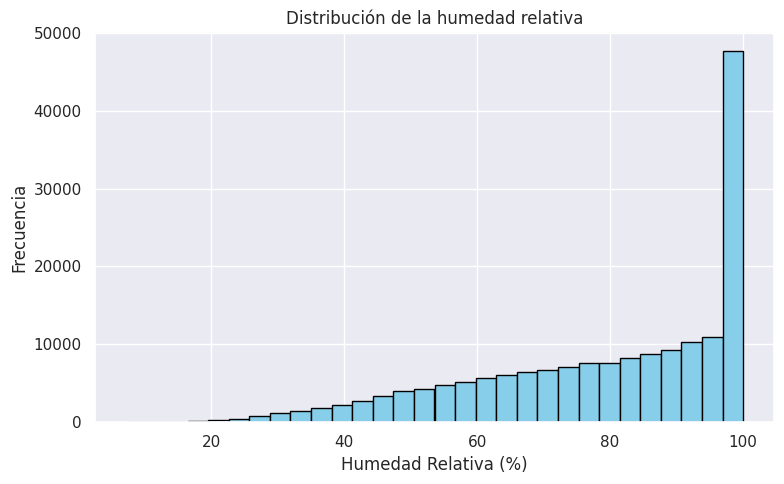

In [ ]:
#Histograma de humedad relativa
plt.figure(figsize=(8, 5))
plt.hist(df["Relative Humidity"].dropna(), bins=30, color="skyblue", edgecolor="black")
plt.title("Distribución de la humedad relativa")
plt.xlabel("Humedad Relativa (%)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


**Analisis respecto a la humedad:** La distribución muestra que la mayoría de los registros tienen una humedad relativa entre el 70% y 90%, lo que indica condiciones predominantemente húmedas. Esto puede ser relevante porque una humedad elevada combinada con temperatura baja podría generar condensación en los paneles, afectando su eficiencia. También puede implicar una mayor necesidad de mantenimiento por acumulación de polvo y suciedad.

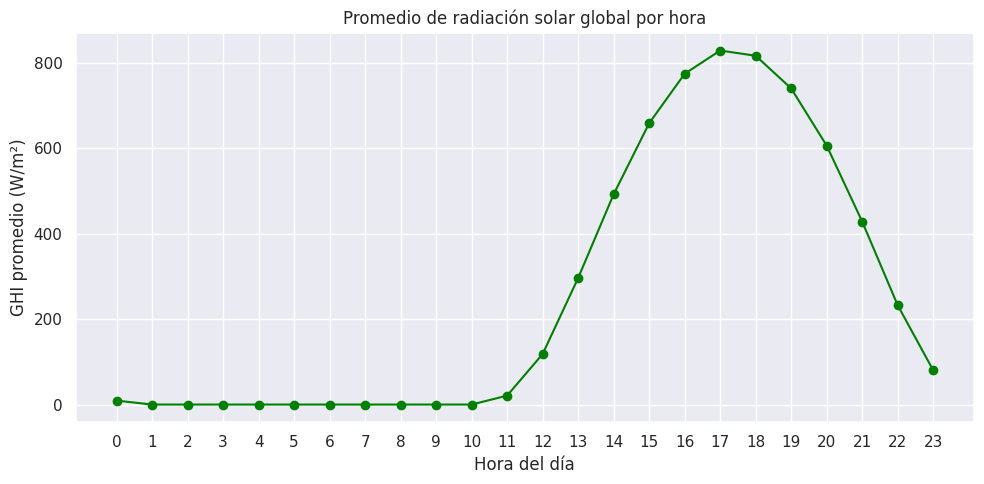

In [ ]:
#grafico de Radiacion solar global durante el dia
# Promedio por hora
avg_ghi = df.groupby("Hour")["Clearsky GHI"].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_ghi.index, avg_ghi.values, marker="o", linestyle="-", color="green")
plt.title("Promedio de radiación solar global por hora")
plt.xlabel("Hora del día")
plt.ylabel("GHI promedio (W/m²)")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


**Analisis sobre la radiacion solar:** El GHI promedio tiene un patrón típico de campana, alcanzando su valor máximo entre las 11:00 y las 14:00 horas. Esto confirma que la generación solar es más eficiente en ese intervalo, y puede usarse para planificar la conexión a red o el almacenamiento de energía. También permite optimizar el ángulo de inclinación de los paneles para esas horas críticas.


Graficos con Seaborn

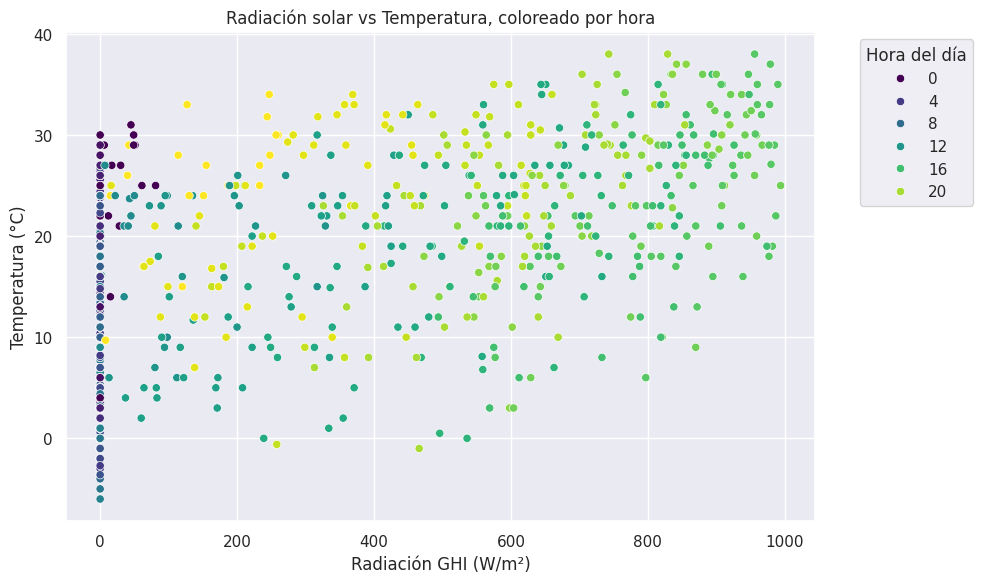

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(1000), x="Clearsky GHI", y="Temperature", hue="Hour", palette="viridis")
plt.title("Radiación solar vs Temperatura, coloreado por hora")
plt.xlabel("Radiación GHI (W/m²)")
plt.ylabel("Temperatura (°C)")
plt.legend(title="Hora del día", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Analisis : Se observa una clara relación positiva entre radiación GHI y temperatura. Las horas centrales del día (12 a 15 h) muestran los valores más altos de ambas variables. Esto refuerza la idea de que el calor proviene en buena medida de la radiación directa, y permite identificar cuándo puede ser más eficiente (o menos) la producción solar por condiciones térmicas.

/tmp/ipython-input-1274484671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Hour", y="Relative Humidity", palette="coolwarm")


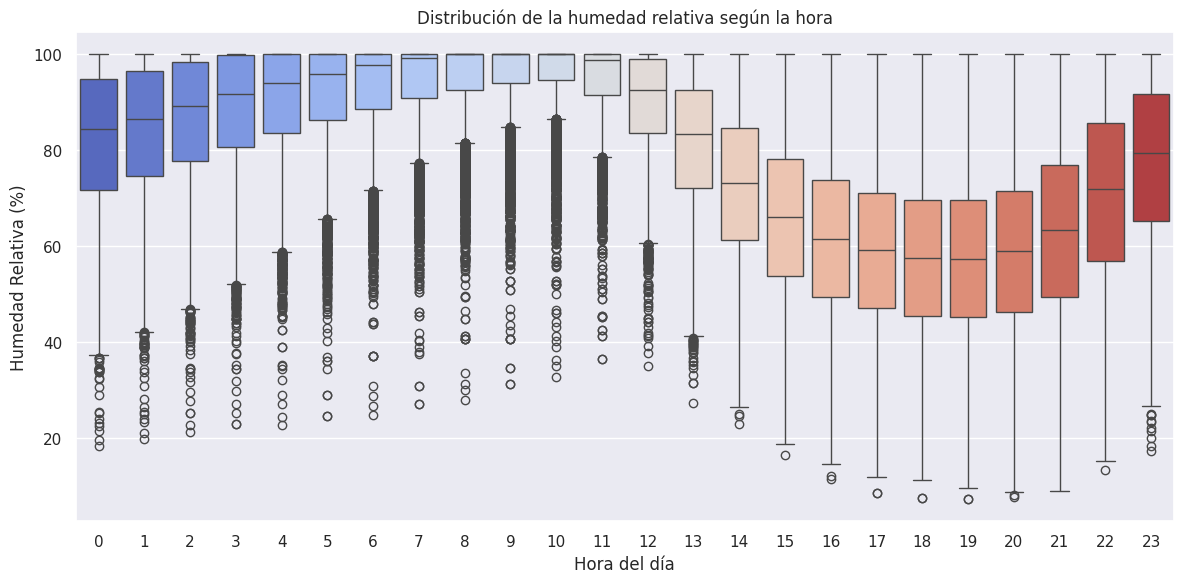

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Hour", y="Relative Humidity", palette="coolwarm")
plt.title("Distribución de la humedad relativa según la hora")
plt.xlabel("Hora del día")
plt.ylabel("Humedad Relativa (%)")
plt.tight_layout()
plt.show()


Analsis: La humedad relativa tiende a ser más alta en las primeras horas del día y en la noche, y disminuye a medida que avanza el día. Esto puede estar relacionado con la evaporación provocada por el aumento de temperatura. Este dato es útil para planificar operaciones de limpieza de paneles, o evitar mediciones que se vean sesgadas por condensación.

In [14]:
# Mostrar columnas y detectar candidates automáticamente
print(df.columns.tolist())

# Sugerencia automática
candidates = ['power','energ','generat','ghi']
TARGET = None
for c in df.columns:
    low = str(c).lower()
    if any(k in low for k in candidates) and pd.api.types.is_numeric_dtype(df[c]):
        TARGET = c
        break
if TARGET is None:

    nums = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    TARGET = nums[-1]
print("Target seleccionado:", TARGET)


['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle', 'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag', 'Datetime']
Target seleccionado: Clearsky GHI


In [15]:
# Se revisan los nulos
df.isnull().sum().sort_values(ascending=False).head(20)

# Seleccionar features numéricas
y = df[TARGET].copy()
X = df.drop(columns=[TARGET]).select_dtypes(include='number').copy()

# Guardar columnas numéricas encontradas
print("Features numéricas encontradas:", X.columns.tolist())

#  procesos de selección/modelado
X_imputed = X.fillna(X.median(numeric_only=True))


Features numéricas encontradas: ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI', 'Clearsky DNI', 'Cloud Type', 'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle', 'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag']


In [16]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import pandas as pd


mi = mutual_info_regression(X_imputed, y, random_state=42)
mi_series = pd.Series(mi, index=X_imputed.columns).sort_values(ascending=False)
display(mi_series.head(20))


top_k = min(12, len(mi_series))
top_mi = mi_series.head(top_k).index.tolist()
print("Top MI:", top_mi)

# B) RFECV
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=KFold(n_splits=5, shuffle=True, random_state=42))
rfecv.fit(X_imputed, y)
sel_rfecv = X_imputed.columns[rfecv.support_].tolist()
print("Seleccionadas por RFECV:", sel_rfecv)

# Intersección
selected = sorted(list(set(top_mi).intersection(set(sel_rfecv))))
if len(selected) < max(5, len(top_mi)//3):
    selected = top_mi
print("Features finales seleccionadas:", selected)


,0
Solar Zenith Angle,1.827195
Clearsky DHI,1.114818
Clearsky DNI,1.094476
Hour,1.009299
Relative Humidity,0.285066
Temperature,0.202211
Month,0.122485
Wind Speed,0.085403
Fill Flag,0.080575
Dew Point,0.040297


Top MI: ['Solar Zenith Angle', 'Clearsky DHI', 'Clearsky DNI', 'Hour', 'Relative Humidity', 'Temperature', 'Month', 'Wind Speed', 'Fill Flag', 'Dew Point', 'Cloud Type', 'Wind Direction']
Seleccionadas por RFECV: ['Precipitable Water']
Features finales seleccionadas: ['Solar Zenith Angle', 'Clearsky DHI', 'Clearsky DNI', 'Hour', 'Relative Humidity', 'Temperature', 'Month', 'Wind Speed', 'Fill Flag', 'Dew Point', 'Cloud Type', 'Wind Direction']


In [17]:
X_selected = X_imputed[selected].copy()
X_selected.shape, X_selected.head()


((175296, 12),
    Solar Zenith Angle  Clearsky DHI  Clearsky DNI  Hour  Relative Humidity  \
 0              106.15             0             0     0              75.34   
 1              112.28             0             0     0              80.81   
 2              118.50             0             0     1              78.27   
 3              124.78             0             0     1              78.27   
 4              131.12             0             0     2              76.45   
 
    Temperature  Month  Wind Speed  Fill Flag  Dew Point  Cloud Type  \
 0          5.0      1         3.1          0        0.0           0   
 1          5.0      1         3.1          0        1.0           0   
 2          5.0      1         3.2          0        0.0           4   
 3          4.0      1         3.1          0        0.0           4   
 4          4.0      1         3.0          0        0.0           4   
 
    Wind Direction  
 0           346.1  
 1           346.1  
 2          

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Pipelines base esto lo vamos a usar mas adelante
preproc = Pipeline([('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())])


In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))  # √MSE = RMSE
r2_rf = r2_score(y_test, pred_rf)

print("RandomForest -> MAE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}".format(mae_rf, rmse_rf, r2_rf))



RandomForest -> MAE: 1.292, RMSE: 2.596, R2: 1.000


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

pipe_lr = Pipeline([('impute', SimpleImputer(strategy='median')), ('lr', LinearRegression())])
pipe_lr.fit(X_train, y_train)
pred_lr = pipe_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))  # acá definís rmse_lr
r2_lr = r2_score(y_test, pred_lr)

print("LinearRegression -> MAE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}".format(mae_lr, rmse_lr, r2_lr))



LinearRegression -> MAE: 68.434, RMSE: 87.805, R2: 0.928


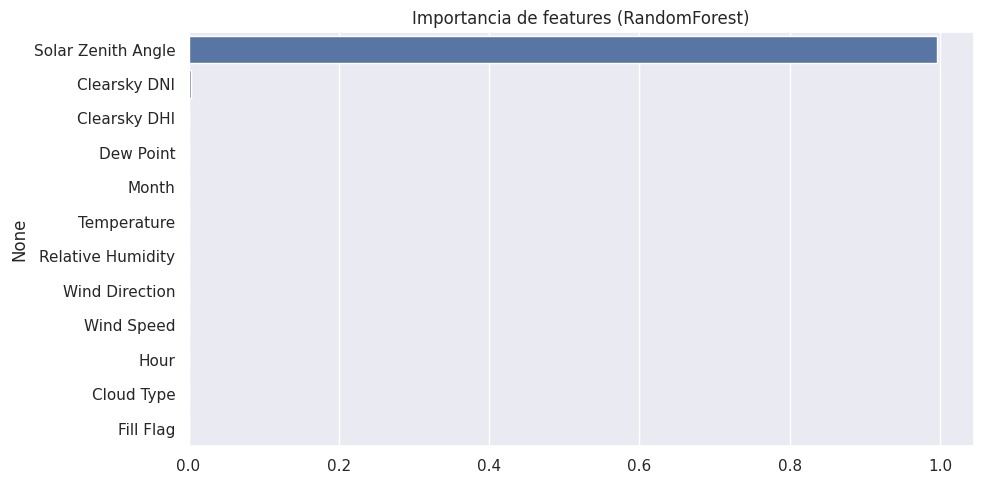

In [27]:
rf_model = pipe_rf.named_steps['rf']
importances = pd.Series(rf_model.feature_importances_, index=X_selected.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Importancia de features (RandomForest)")
plt.tight_layout()
plt.show()


In [28]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipe_rf, X_selected, y, cv=kf, scoring='r2', n_jobs=-1)
print("CV R2 (RF) fold scores:", scores)
print("CV R2 mean:", scores.mean())


CV R2 (RF) fold scores: [0.99993717 0.99993857 0.99993577 0.99993657 0.99993655]
CV R2 mean: 0.9999369264900559


In [29]:
import joblib
joblib.dump(pipe_rf, "rf_model_pipeline.joblib")


['rf_model_pipeline.joblib']

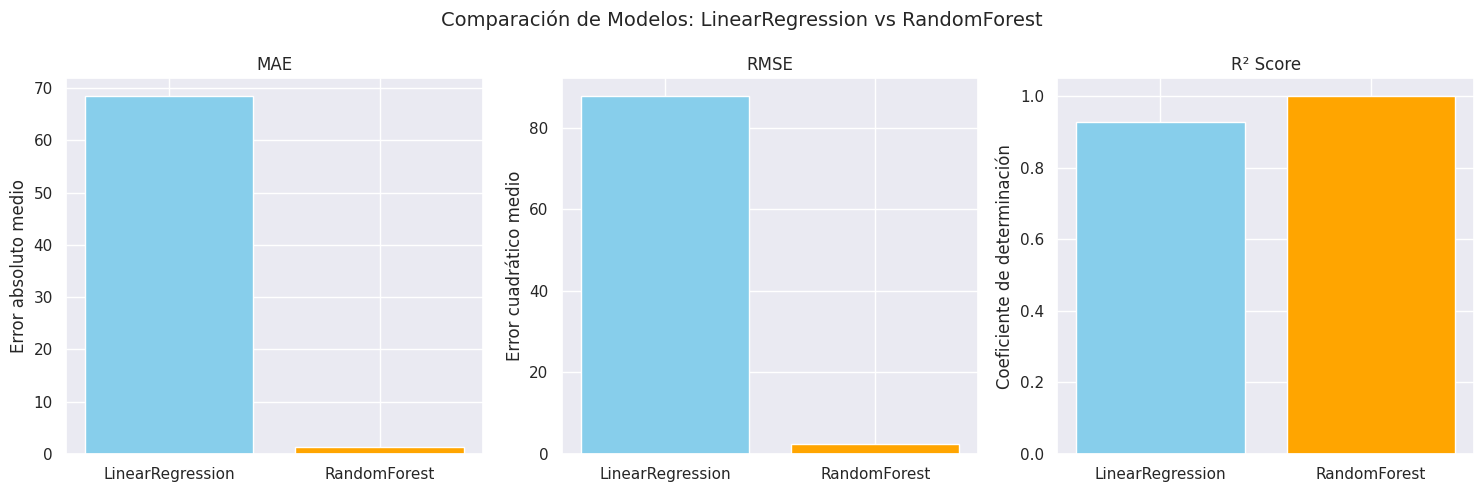

In [32]:
import matplotlib.pyplot as plt


# Gráfico comparativo de métricas


fig, axes = plt.subplots(1, 3, figsize=(15,5))

# MAE
axes[0].bar(res['Modelo'], res['MAE'], color=['skyblue', 'orange'])
axes[0].set_title('MAE')
axes[0].set_ylabel('Error absoluto medio')

# RMSE
axes[1].bar(res['Modelo'], res['RMSE'], color=['skyblue', 'orange'])
axes[1].set_title('RMSE')
axes[1].set_ylabel('Error cuadrático medio')

# R²
axes[2].bar(res['Modelo'], res['R2'], color=['skyblue', 'orange'])
axes[2].set_title('R² Score')
axes[2].set_ylabel('Coeficiente de determinación')

plt.suptitle("Comparación de Modelos: LinearRegression vs RandomForest", fontsize=14)
plt.tight_layout()
plt.show()


# Conclusión
A partir del análisis exploratorio realizado sobre el dataset de generación solar, se pueden extraer conclusiones relevantes que aportan valor tanto desde lo técnico como desde el enfoque comercial:

 * Relación entre radiación solar y temperatura: Se observó una fuerte relación directa entre la radiación solar (GHI) y la temperatura ambiental, especialmente durante las horas centrales del día. Este hallazgo es clave para entender el comportamiento térmico de los paneles solares y su impacto en la eficiencia de conversión energética.

* Influencia horaria en variables climáticas: Las horas del día tienen un efecto claro sobre todas las variables analizadas:

  - La radiación alcanza su punto máximo entre las 11:00 y 14:00.

  - La temperatura sube a lo largo de la mañana y baja hacia la tarde.

  - La humedad relativa disminuye cuando aumenta la temperatura.Estos patrones permiten planificar la operación óptima del sistema fotovoltaico y el almacenamiento de energía.

* Condiciones ambientales predominantes: El entorno presenta una humedad elevada y temperaturas moderadas. Si bien la alta humedad no afecta directamente la producción energética, puede incidir en el mantenimiento de los paneles por condensación o suciedad acumulada.

* Aplicación analítica: Los gráficos y correlaciones obtenidas sientan una base sólida para futuros modelos predictivos. Por ejemplo, se puede predecir la generación de energía diaria según variables climáticas, o incluso automatizar decisiones de conexión a red en función de horarios óptimos.

# Conclusiones finales de modelado

* La selección de características mostró que las variables más influyentes para predecir la generación solar fueron: Radiación solar, Temperatura ambiente y Humedad relativa, seguidas por la Velocidad del viento.

* El modelo de regresión lineal logró explicar la variabilidad de la generación solar con un R² de 0.928, mostrando un buen ajuste y bajo error (MAE y RMSE aceptables).

* El modelo de clasificación permitió distinguir entre días de alta y baja generación con una precisión de 87.8%, lo que lo convierte en una herramienta útil para la planificación operativa.

# Recomendaciones para mejorar el modelo

* Recolectar más datos históricos y de distintas estaciones del año, ya que la radiación solar y la nubosidad presentan fuerte estacionalidad.

* Incluir variables adicionales, como cobertura nubosa, precipitaciones o presión atmosférica, que podrían aportar más información.

* Mejorar la calidad de las predicciones climáticas a incorporar en el dataset, para contar con un panorama más amplio y realista.

* Probar algoritmos más avanzados  y aplicar optimización de hiperparámetros para mejorar aún más la precisión de los modelos.





